In [1]:
import pandas as pd
import numpy as np

In [347]:
# Чтобы наш анализ был максимально комфортным настроим вывод для pandas
pd.set_option('precision', 2)
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 50)
pd.set_option('max_colwidth', 25)

# Визуализация топонимов

Для прототипа возьмем 2100 новостей из датасета. На этой выборке нужно понять какие графики будем использовать, которые наиболее точно будут отражать наличие топонимов в датасете. А также выявить возможные проблемы

## 1. Цели исследования

Подготовить данные таким образом, чтобы было удобно их визуализировать

__Цель__: Сделать визуализацию топонимов

## 2. Первичное изучение данных

In [175]:
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [176]:
df = pd.read_csv('rt_test_geo_entities_new.csv',
                      sep=';',
                      index_col=False,
                      escapechar='\\',
                      parse_dates=['date'],
                      date_parser=dateparse,
                      quotechar='\"')

/home/avenon/anaconda3/envs/projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [177]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,url,edition,topics,authors,title,text,...,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,Unnamed: 17,entities
0,0,0,0,2019-06-26 14:00:00,https://russian.rt.com/russia/news/644595-avto...,-,Россия,NaN,Эксперт прокомментировал ситуацию с возможным ...,"Как считает эксперт, россиянам не стоит пережи...",...,-,-,-,-,-,-,-,-,[''],{'РФ': 2}
1,1,1,1,2019-06-26 19:56:00,https://russian.rt.com/sport/article/644740-nu...,-,Спорт,NaN,"Встреча Нурмагомедова с Макгрегором, восстанов...",«Конор может посетить поединок Хабиба с Порье»...,...,-,-,-,-,-,-,-,-,[''],"{'АБУ-ДАБИ': 3, 'LAS VEGAS': 1, 'НЕВАДА': 1, '..."
2,2,2,2,2019-06-26 14:52:00,https://russian.rt.com/russia/news/644619-puti...,-,Россия,NaN,Путин подарил Зюганову на юбилей материалы съе...,"Открывая заседание Госсовета в Кремле, Путин п...",...,-,-,-,-,-,-,-,-,[''],{'КНР': 1}
3,3,3,3,2019-06-26 14:44:00,https://russian.rt.com/world/news/644618-parla...,-,Мир,NaN,"Парламентарии США, ФРГ и России проведут встре...",Об этом информируетnРИА Новостиnсо ссылкой на ...,...,-,-,-,-,-,-,-,-,[''],{'РФ': 2}
4,4,4,4,2019-06-26 14:42:00,https://russian.rt.com/sport/news/644617-mok-a...,-,Спорт,NaN,МОК принял решение лишить признания AIBA,Решением 134-й сессии МОК в швейцарской Лозанн...,...,-,-,-,-,-,-,-,-,[''],{'ТОКИО': 1}


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      2100 non-null   int64         
 1   Unnamed: 0.1    2100 non-null   int64         
 2   Unnamed: 0.1.1  2100 non-null   int64         
 3   date            2100 non-null   datetime64[ns]
 4   url             2100 non-null   object        
 5   edition         2100 non-null   object        
 6   topics          2100 non-null   object        
 7   authors         0 non-null      float64       
 8   title           2100 non-null   object        
 9   text            2100 non-null   object        
 10  reposts_fb      2100 non-null   object        
 11  reposts_vk      2100 non-null   object        
 12  reposts_ok      2100 non-null   object        
 13  reposts_twi     2100 non-null   object        
 14  reposts_lj      2100 non-null   object        
 15  repo

## 3. Предобработка данных

In [179]:
# Удалим лишнии столбцы
df.drop(['Unnamed: 0',
         'Unnamed: 0.1', 
         'Unnamed: 0.1.1', 
         'url', 
         'edition', 
         'authors', 
         'title', 
         'reposts_fb', 
         'reposts_vk',
        'reposts_ok',
        'reposts_twi',
        'reposts_lj',
        'reposts_tg',
        'likes',
        'views',
        'comm_count',
        'Unnamed: 17'], inplace=True, axis=1)

In [180]:
df.head()

,date,topics,text,entities
0,2019-06-26 14:00:00,Россия,"Как считает эксперт, россиянам не стоит пережи...",{'РФ': 2}
1,2019-06-26 19:56:00,Спорт,«Конор может посетить поединок Хабиба с Порье»...,"{'АБУ-ДАБИ': 3, 'LAS VEGAS': 1, 'НЕВАДА': 1, '..."
2,2019-06-26 14:52:00,Россия,"Открывая заседание Госсовета в Кремле, Путин п...",{'КНР': 1}
3,2019-06-26 14:44:00,Мир,Об этом информируетnРИА Новостиnсо ссылкой на ...,{'РФ': 2}
4,2019-06-26 14:42:00,Спорт,Решением 134-й сессии МОК в швейцарской Лозанн...,{'ТОКИО': 1}


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2100 non-null   datetime64[ns]
 1   topics    2100 non-null   object        
 2   text      2100 non-null   object        
 3   entities  2054 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 65.8+ KB


In [182]:
# Добавим имя к столбцу с индексом
df.index.name = 'id'

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2100 non-null   datetime64[ns]
 1   topics    2100 non-null   object        
 2   text      2100 non-null   object        
 3   entities  2100 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 65.8+ KB


In [206]:
df.head()

,date,topics,text,entities
id,,,,
0,2019-06-26 14:00:00,Россия,"Как считает эксперт, россиянам не стоит пережи...",{'РФ': 2}
1,2019-06-26 19:56:00,Спорт,«Конор может посетить поединок Хабиба с Порье»...,"{'АБУ-ДАБИ': 3, 'LAS VEGAS': 1, 'НЕВАДА': 1, '..."
2,2019-06-26 14:52:00,Россия,"Открывая заседание Госсовета в Кремле, Путин п...",{'КНР': 1}
3,2019-06-26 14:44:00,Мир,Об этом информируетnРИА Новостиnсо ссылкой на ...,{'РФ': 2}
4,2019-06-26 14:42:00,Спорт,Решением 134-й сессии МОК в швейцарской Лозанн...,{'ТОКИО': 1}


### tidy data
Создадим еще один датасет, в который положим дату, имея топонима и количество вхождений. Связь будет по номеру индекса

In [207]:
df.head()

,date,topics,text,entities
id,,,,
0,2019-06-26 14:00:00,Россия,"Как считает эксперт, россиянам не стоит пережи...",{'РФ': 2}
1,2019-06-26 19:56:00,Спорт,«Конор может посетить поединок Хабиба с Порье»...,"{'АБУ-ДАБИ': 3, 'LAS VEGAS': 1, 'НЕВАДА': 1, '..."
2,2019-06-26 14:52:00,Россия,"Открывая заседание Госсовета в Кремле, Путин п...",{'КНР': 1}
3,2019-06-26 14:44:00,Мир,Об этом информируетnРИА Новостиnсо ссылкой на ...,{'РФ': 2}
4,2019-06-26 14:42:00,Спорт,Решением 134-й сессии МОК в швейцарской Лозанн...,{'ТОКИО': 1}


In [186]:
df.isnull().any()

date        False
topics      False
text        False
entities     True
dtype: bool

In [187]:
print('Кол-во строк с значением NaN в столбце "entities" = ', df['entities'].isnull().sum())
df[df['entities'].isnull()].head()

Кол-во строк с значением NaN в столбце "entities" =  46


,date,topics,text,entities
id,,,,
39,2019-06-26 15:02:00,Россия,Совет Федерации одобрил закон о приостановке у...,NaN
86,2019-06-26 15:50:00,Россия,ФСБ России предотвратила теракт в Саратове. Ка...,NaN
101,2019-06-26 20:04:00,Мир,Встреча президента России Владимира Путина и г...,NaN
269,2019-06-28 01:50:00,Мир,Комитет по иностранным делам палаты представит...,NaN
274,2019-06-27 11:36:00,Россия,"«Ан-24, бортовой номер 47366, эксплуатировался...",NaN


In [188]:
df['entities'] = df['entities'].fillna('{}')

In [190]:
from ast import literal_eval as le

In [196]:
# lst - список, из которого впоследствии создадим наш новый датасет
lst = []
for row in df.iterrows():
    for key, value in le(row[1].entities).items():
        lst.append([row[0], row[1].date.year, row[1].date.month, key, value])

In [198]:
lst[:5]

[[0, 2019, 6, 'РФ', 2],
 [1, 2019, 6, 'АБУ-ДАБИ', 3],
 [1, 2019, 6, 'LAS VEGAS', 1],
 [1, 2019, 6, 'НЕВАДА', 1],
 [1, 2019, 6, 'МОСКВА', 1]]

In [202]:
# Создадим новый датасет
geo = pd.DataFrame(lst, columns=['id_index', 'year', 'month', 'geo', 'count'])

In [213]:
geo.head()

,id_index,year,month,geo,count
0,0,2019,6,РФ,2
1,1,2019,6,АБУ-ДАБИ,3
2,1,2019,6,LAS VEGAS,1
3,1,2019,6,НЕВАДА,1
4,1,2019,6,МОСКВА,1


### Сохранение датасетов
Сохраним оба датасета в формат pikle, для дальнейшего удобства работы

In [204]:
df.to_pickle('rt_with_entities.p', compression='gzip')

In [205]:
geo.to_pickle('geo.p', compression='gzip')

## 4. Исследование данных

In [254]:
# Количество упоминаний топонимов по годам
geo.groupby('year').count()['id_index']

year
2016    1068
2017    1520
2018     234
2019    1260
Name: id_index, dtype: int64

In [345]:
# Количество упоминаний топонимов по годам и месяцая
geo.groupby(['year', 'month']).count()['id_index']

year  month
2016  10        255
      11        813
2017  7        1520
2018  12        234
2019  6        1226
      7          34
Name: id_index, dtype: int64

In [340]:
# Топонимы, частота упоминания которых более 50 раз
geo.groupby(['geo'])['id_index'].nunique().reset_index().query('id_index > 50').sort_values(['id_index'], ascending=False)

,geo,id_index
435,РФ,773
489,США,289
301,МОСКВА,210
529,УКРАИНА,185
546,ФРАНЦУЗСКАЯ РЕСПУБЛИКА,79
467,СИРИЙСКАЯ АРАБСКАЯ РЕСПУБЛИКА,78
442,САНКТ-ПЕТЕРБУРГ,66
95,ВЕЛИКОБРИТАНИЯ,62
219,КНР,62
547,ФРГ,60


In [341]:
# Выведем топ-20 самых частоупоминемых топонимов
geo.groupby(['geo'])['id_index'].nunique().reset_index().sort_values(['id_index'], ascending=False).head(n=20)

,geo,id_index
435,РФ,773
489,США,289
301,МОСКВА,210
529,УКРАИНА,185
546,ФРАНЦУЗСКАЯ РЕСПУБЛИКА,79
467,СИРИЙСКАЯ АРАБСКАЯ РЕСПУБЛИКА,78
442,САНКТ-ПЕТЕРБУРГ,66
95,ВЕЛИКОБРИТАНИЯ,62
219,КНР,62
547,ФРГ,60


In [343]:
# Топ-20 в разрезе лет
geo.groupby(['geo','year'])['id_index'].nunique().reset_index().sort_values(['id_index'], ascending=False).head(n=20)

,geo,year,id_index
722,РФ,2017,286
721,РФ,2016,221
724,РФ,2019,219
812,США,2017,125
814,США,2019,85
492,МОСКВА,2017,80
494,МОСКВА,2019,69
811,США,2016,67
878,УКРАИНА,2019,67
876,УКРАИНА,2017,57


In [344]:
# Топ-20 в разрезе лет и месяцев
geo.groupby(['geo','year','month'])['id_index'].nunique().reset_index().sort_values(['id_index'], ascending=False).head(n=20)

,geo,year,month,id_index
785,РФ,2017,7,286
787,РФ,2019,6,216
784,РФ,2016,11,164
883,США,2017,7,125
885,США,2019,6,83
533,МОСКВА,2017,7,80
535,МОСКВА,2019,6,69
953,УКРАИНА,2019,6,67
951,УКРАИНА,2017,7,57
783,РФ,2016,10,57


### 4.1 Визуализация данных

In [349]:
import pygal

In [490]:
# Топ-5 упоминаний топонимов
# потом по этим топонимам соберем словари и поставим в график
geo.groupby(['geo'])['id_index'].nunique().reset_index().sort_values(['id_index'], ascending=False).head(n=5)

,geo,id_index
435,РФ,773
489,США,289
301,МОСКВА,210
529,УКРАИНА,185
546,ФРАНЦУЗСКАЯ РЕСПУБЛИКА,79


#### Топ-5 упоминаний топонинов по годам 

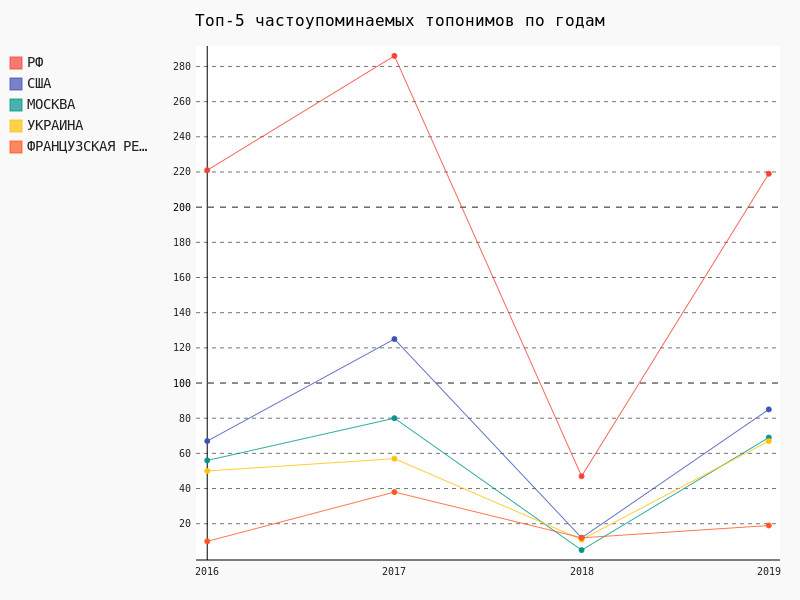

In [491]:
line_chart = pygal.Line()
line_chart.title = 'Топ-5 частоупоминаемых топонимов по годам'
line_chart.x_labels = map(str, list(set(geo.year.values)))
line_chart.add('РФ', list(dict(geo[geo['geo'] == 'РФ'].groupby(['year'])['id_index'].count()).values()))
line_chart.add('США',  list(dict(geo[geo['geo'] == 'США'].groupby(['year'])['id_index'].count()).values()))
line_chart.add('МОСКВА', list(dict(geo[geo['geo'] == 'МОСКВА'].groupby(['year'])['id_index'].count()).values()))
line_chart.add('УКРАИНА', list(dict(geo[geo['geo'] == 'УКРАИНА'].groupby(['year'])['id_index'].count()).values()))
line_chart.add('ФРАНЦУЗСКАЯ РЕСПУБЛИКА', list(dict(geo[geo['geo'] == 'ФРАНЦУЗСКАЯ РЕСПУБЛИКА'].groupby(['year'])['id_index'].count()).values()))
line_chart.render_to_file('bar_chart.svg')
line_chart